<a href="https://colab.research.google.com/github/ErfanS99/python_course_SRBIAU/blob/main/ex_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [188]:
k = 10 # Spring coefficient
m = 0.5 # Mass
c = 2 # Viscosity ratio
x0 = 0 # Initial position
v0 = 0 # Initial velocity

In [189]:
t_span = np.linspace(0,5,1000)
x = np.zeros((2,len(t_span)))
x[:,0] = np.array([x0,v0])
dt = t_span[1]-t_span[0]

In [190]:
def GEOM(x,F,dt):
  wn = np.sqrt(k/m)
  zeta = c / (2 * m * wn)
  u = F / m
  dx1 = x[1]
  dx2 = u -2*zeta*wn*dx1 - wn**2 * x[0]
  return np.array([dx1,dx2])


In [283]:
Kp = 2.5
Ki = 7
Kd = 2
x_des = np.sin(2*np.pi*t_span)
# x_des = np.ones(len(t_span))

In [284]:
error_sum = 0
for i in range(len(t_span)-1):
  error = x_des[i] - x[0,i]

  error_sum += error * dt

  P = Kp * error
  I = Ki * error_sum * dt
  D = Kd * (x_des[i+1] - x_des[i])
  F = P + I + D

  x[:,i+1] = x[:,i] + GEOM(x[:,i],F,dt)*dt

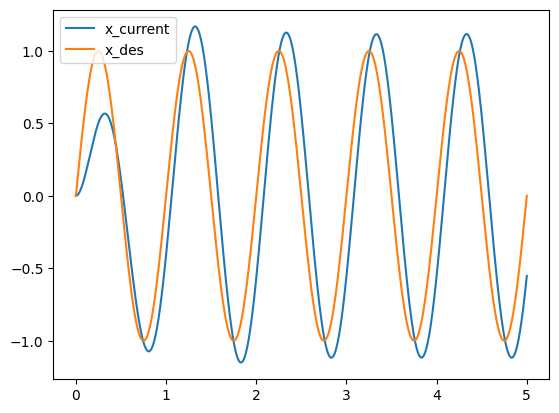

In [285]:
plt.plot(t_span,x[1,:])
plt.plot(t_span, x_des)
plt.legend(["x_current", "x_des"])
